#  Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud


#  Load Dataset

In [2]:
df = pd.read_csv("climate_nasa.csv")
df.head()


,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


# Basic Data Exploration

In [4]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nSummary:")
print(df.describe(include='all'))

print("\nMissing Values:")
print(df.isnull().sum())

# Check average engagement
print("Average Likes:", df['likesCount'].mean())
print("Average Comments:", df['commentsCount'].mean())



Shape: (522, 5)
Columns: ['date', 'likesCount', 'profileName', 'commentsCount', 'text']

Summary:
                            date  likesCount  \
count                        522  522.000000   
unique                       522         NaN   
top     2022-12-22T17:00:08.000Z         NaN   
freq                           1         NaN   
mean                         NaN    4.720307   
std                          NaN   12.053556   
min                          NaN    0.000000   
25%                          NaN    0.000000   
50%                          NaN    1.000000   
75%                          NaN    4.000000   
max                          NaN  126.000000   

                                              profileName  commentsCount  \
count                                                 522     244.000000   
unique                                                483            NaN   
top     0bc1bc50b627dd342e3a0498e0f8240c99d4daf267ebea...            NaN   
freq                 

# Data Preprocessing

In [5]:
# Convert 'date' to datetime and sort
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])
df = df.sort_values('date')

# Extract Year and Month
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month


# Sentiment Classification

In [6]:
# Define keywords for rule-based sentiment
positive_words = ['great', 'amazing', 'love', 'good', 'hope', 'important', 'incredible', 'support']
negative_words = ['worry', 'fake', 'hoax', 'scary', 'danger', 'fear', 'alarming', 'concern']

# Function to classify sentiment
def classify_sentiment(text):
    if not isinstance(text, str):
        return 'Neutral'
    text = text.lower()
    if any(word in text for word in positive_words):
        return 'Positive'
    elif any(word in text for word in negative_words):
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment classification
df['Sentiment'] = df['text'].apply(classify_sentiment)

# Sentiment Distribution
print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())



Sentiment Distribution:
Sentiment
Neutral     442
Positive     58
Negative     22
Name: count, dtype: int64


# Monthly Engagement (Likes & Comments)

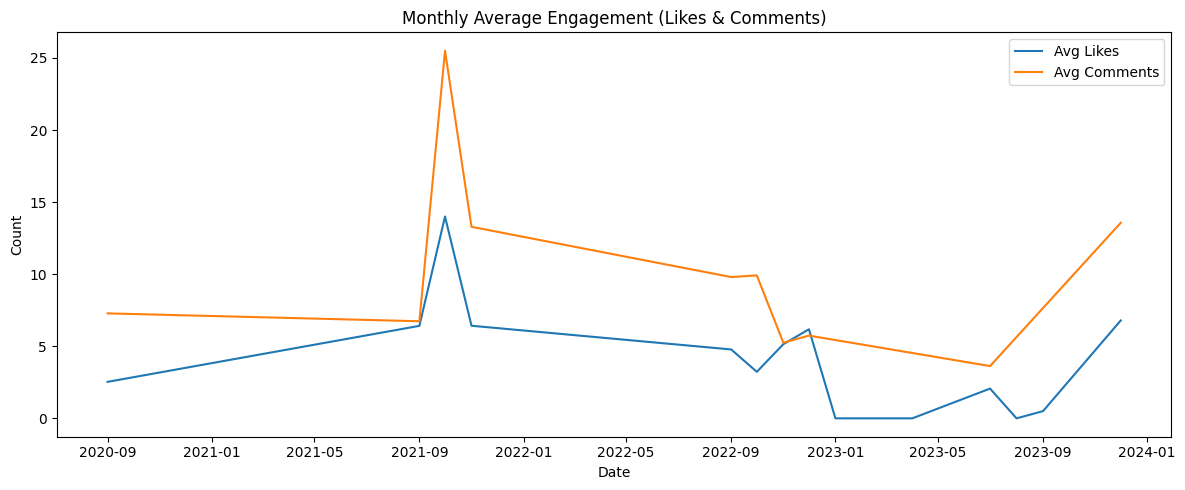

In [7]:
monthly_avg = df.groupby([df['Year'], df['Month']])[['likesCount', 'commentsCount']].mean().reset_index()
monthly_avg['Period'] = pd.to_datetime(monthly_avg[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_avg, x='Period', y='likesCount', label='Avg Likes')
sns.lineplot(data=monthly_avg, x='Period', y='commentsCount', label='Avg Comments')
plt.title("Monthly Average Engagement (Likes & Comments)")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


# Sentiment Pie Chart

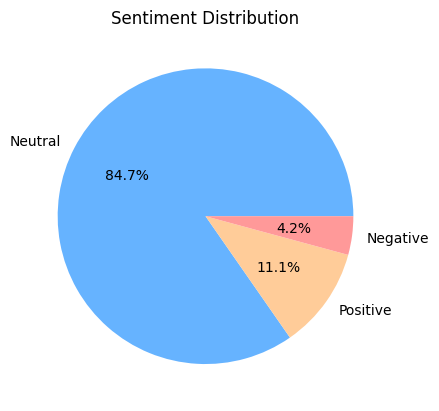

In [8]:
df['Sentiment'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=["#66b3ff", "#ffcc99", "#ff9999"]
)
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()


# Engagement by Sentiment – Bar Charts

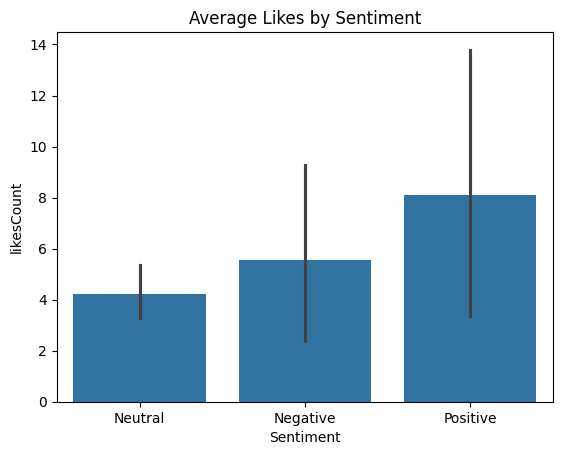

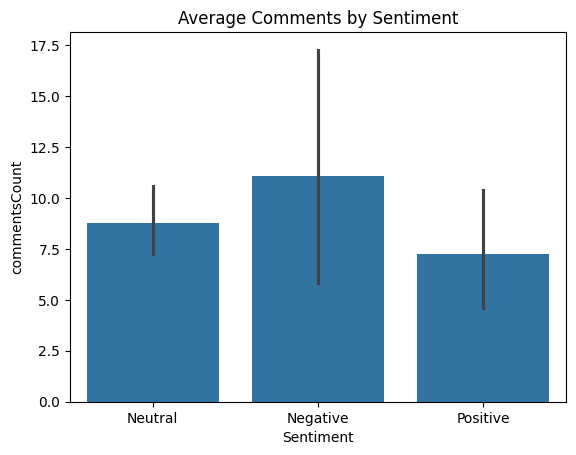

In [9]:
sns.barplot(x='Sentiment', y='likesCount', data=df)
plt.title("Average Likes by Sentiment")
plt.show()

sns.barplot(x='Sentiment', y='commentsCount', data=df)
plt.title("Average Comments by Sentiment")
plt.show()


# Engagement by Sentiment – Boxplots

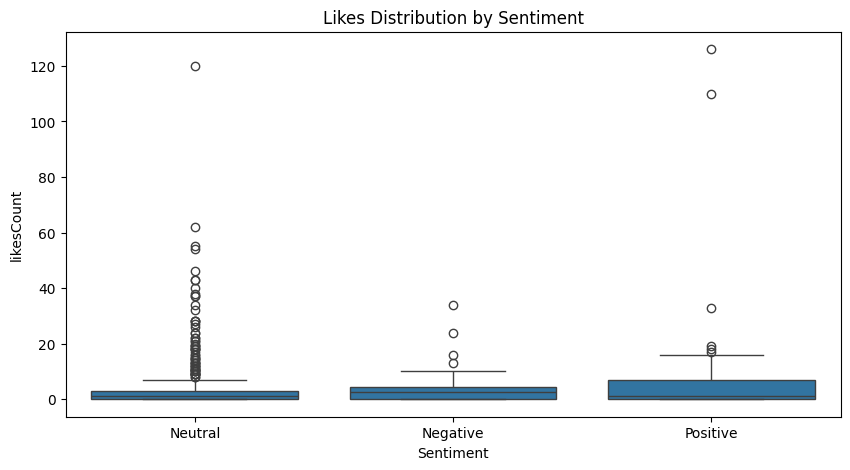

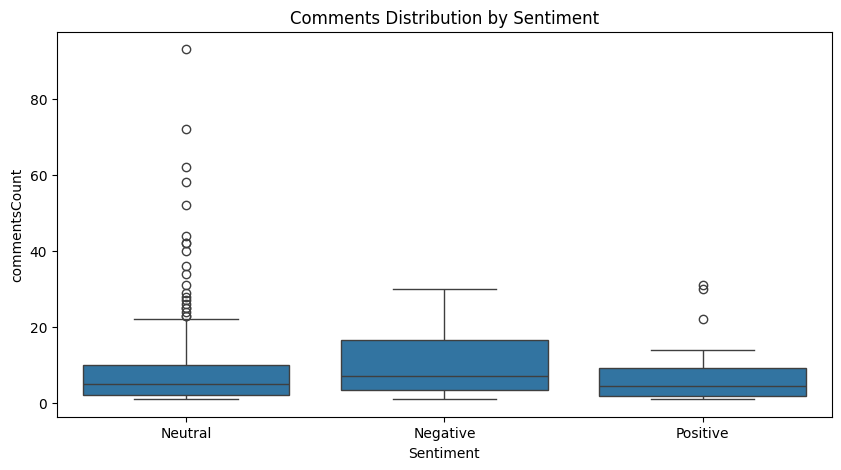

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Sentiment', y='likesCount', data=df)
plt.title("Likes Distribution by Sentiment")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Sentiment', y='commentsCount', data=df)
plt.title("Comments Distribution by Sentiment")
plt.show()


# Text Analysis – Word Frequency

In [11]:
all_text = ' '.join(df['text'].dropna()).lower()
words = re.findall(r'\b\w+\b', all_text)
word_counts = Counter(words)

print("Top 10 most common words:", word_counts.most_common(10))


Top 10 most common words: [('the', 850), ('to', 445), ('of', 347), ('and', 326), ('is', 289), ('a', 288), ('in', 264), ('it', 210), ('that', 200), ('we', 199)]


# Word Cloud of Comments

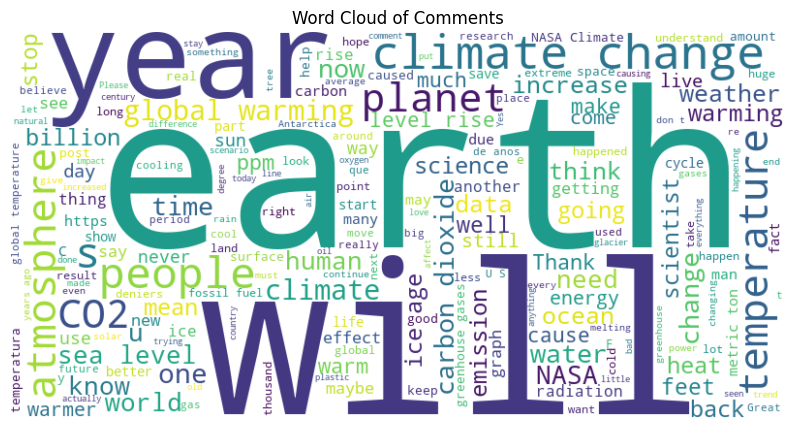

In [12]:
text = ' '.join(df['text'].dropna())
wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Comments")
plt.show()


# Summary of Average Engagement by Sentiment

In [13]:
summary = df.groupby('Sentiment')[['likesCount', 'commentsCount']].mean().round(2)
print("Average Engagement per Sentiment:")
print(summary)


Average Engagement per Sentiment:
           likesCount  commentsCount
Sentiment                           
Negative         5.55          11.09
Neutral          4.24           8.77
Positive         8.09           7.25
